<a href="https://colab.research.google.com/github/volgasezen/di504/blob/main/Lab1/Basics_of_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U portalocker>=2.0.0

# Google Colab and Pytorch Basics
## by Arif Ozan Kızıldağ


This tutorial will introduce you to the basics of PyTorch while we tackle a news classification task using the AG NEWS dataset. While creating this tutorial, the official PyTorch tutorial called [``Text classification with the torchtext library``](https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html) was utilized as a reference.

PyTorch is a Python deep learning library from Facebook mainly written with CUDA, which is a general purpose GPU computing framework of NVIDIA. Its low level design is intended to be similar with Numpy and to follow Python principles as much as possible. It facilitates deep learning applications with its CUDA backend, automatic differentiation mechanism on computational graphs and its utilities for machine learning and deep learning.

In [2]:
import time
import torch
import torchtext
import torchdata

print(f'torch version: {torch.__version__}')
print(f'torchtext version: {torchtext.__version__}')
print(f'torchdata version: {torchdata.__version__}')

torch version: 2.1.0+cu118
torchtext version: 0.16.0+cpu
torchdata version: 0.7.0


Pytorch supports CUDA backend for accelerating parallelizable operations such as matrix multiplication and convolution in GPU. In Colab, Pytorch is installed with CUDA support. You can check if cuda is avaliable in current session by calling `torch.cuda.is_avaliable()` method. If it returns `False`, you can enable it by choosing GPU in menu `Runtime -> Change runtime type -> Hardware Accelerator` and restarting the runtime.

In [3]:
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Thu Oct 26 14:44:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

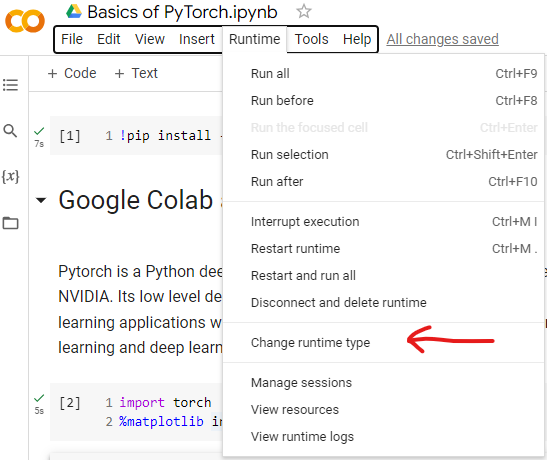

Disclaimer: This tutorial was created using the Google Colab environment at the end of August 2023. With any potential updates to Colab, especially concerning newer versions of Torch, there might be compatibility issues. When importing the libraries, we have printed their respective versions for clarity.

Still working as of October 2023.

## Tensors and Gradients

With Pytorch, you can create tensors in the way that you create arrays in Numpy. `torch.Tensor` is the main data structure of Pytorch. It holds the necesarry information for computation of created computational graphs in both forward and backward mode. Each tensor is an edge in computation.

In [5]:
# basic data operations
x1 = torch.zeros(5, 3) #you can initilize tensors with zeros, ones or rand methods
x2 = torch.ones(5, 3) * 2.5  #example of ones method
x3 = torch.rand(5, 3)  # example of rand method
print('\033[1m'+'Tensor generated with zeros method:'+'\033[0m')
print(x1)
print('\033[1m'+'\nTensor generated with ones method:'+'\033[0m')
print(x2)
print('\033[1m'+'\nRandomly generated tensor:'+'\033[0m')
print(x3)

Tensor generated with zeros method:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Tensor generated with ones method:
tensor([[2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000]])

Randomly generated tensor:
tensor([[0.5037, 0.3336, 0.9714],
        [0.5513, 0.1678, 0.9276],
        [0.5567, 0.6124, 0.8324],
        [0.5678, 0.3100, 0.1773],
        [0.6045, 0.4876, 0.1978]])


Also, you can apply mathematical operations on tensors just as other scientific computing libraries.

In [6]:
print('\033[1m'+'Sum of x2 and x3:'+'\033[0m')
print(x2 + x3)
print('\033[1m'+'\nTranspose of x3:'+'\033[0m')
print(x3.T)
print('\033[1m'+'\nShape of x2'+'\033[0m')
print(x2.shape)    #shape method of the Tensor return dimentions of the tensor
print('\033[1m'+'\nShape of x3.T '+'\033[0m')
print(x3.T.shape)
print('\033[1m'+'\nMatrix multiplication of x2 and x3.T'+'\033[0m')
print(x2 @ x3.T) # @ is matrix multiplication operator. You can use .matmul() method as well.

Sum of x2 and x3:
tensor([[3.0037, 2.8336, 3.4714],
        [3.0513, 2.6678, 3.4276],
        [3.0567, 3.1124, 3.3324],
        [3.0678, 2.8100, 2.6773],
        [3.1045, 2.9876, 2.6978]])

Transpose of x3:
tensor([[0.5037, 0.5513, 0.5567, 0.5678, 0.6045],
        [0.3336, 0.1678, 0.6124, 0.3100, 0.4876],
        [0.9714, 0.9276, 0.8324, 0.1773, 0.1978]])

Shape of x2
torch.Size([5, 3])

Shape of x3.T 
torch.Size([3, 5])

Matrix multiplication of x2 and x3.T
tensor([[4.5216, 4.1166, 5.0037, 2.6376, 3.2247],
        [4.5216, 4.1166, 5.0037, 2.6376, 3.2247],
        [4.5216, 4.1166, 5.0037, 2.6376, 3.2247],
        [4.5216, 4.1166, 5.0037, 2.6376, 3.2247],
        [4.5216, 4.1166, 5.0037, 2.6376, 3.2247]])



Pytorch's autograd module lets you take derivatives of the leaf nodes in computational graphs by calling `.backward()` method of the scalar tensor to be differentiated. In this example, derivative of `x` with respect to `out = mean(x + y)` is computed by autograd. Note that differentiation by a matrix (or tensor) is nothing but differentiating by all elements in the matrix.

By default, Pytorch does not keep gradients of newly created tensors, unless you specify it when creating a tensor.

In [7]:
x = torch.ones(2, 3, requires_grad=True)
y = torch.ones(2, 3, requires_grad=True) * 0.5
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


Pytorch also keeps track of the operations that create tensors to apply chain rule at backward propagation. For example, y is created by a multiplication while x is not.

In [8]:
print(y)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], grad_fn=<MulBackward0>)


In [9]:
z = 2*x + y
print(z)

tensor([[2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000]], grad_fn=<AddBackward0>)


In [10]:
out_scalar = z.mean()
print(out_scalar)

tensor(2.5000, grad_fn=<MeanBackward0>)


When you call `.backward()` of a 'scalar valued' tensor, autograd module automatically populates the `.grad` fields of the other tensors in computational graph.

In [11]:
out_scalar.backward()
print(x.grad)

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])


In [12]:
x.grad.sum()

tensor(2.)

## GPU vs CPU

You can send tensors in GPU memory by calling `.cuda()` methods from tensors. If you run an operations on tensors in the GPU memory, it will automatically be calculated in GPU so that you don't need to use CUDA for most operations.

Here is a benchmark for multiplication of large matrices in CPU and GPU.

In [13]:
x = torch.rand(500, 700)
y = torch.rand(700, 900)

start = time.time()

for n in range(5000):# depending on the systems cpu this process may take some time
    x.matmul(y)

end = time.time()

cpu_time = end - start
print(f'Calculation took {cpu_time:.2f} seconds')

Calculation took 34.70 seconds


In [14]:
x = torch.rand(500, 700).cuda()
y = torch.rand(700, 900).cuda()

start = time.time()

for n in range(5000):
    x.matmul(y)

end = time.time()

gpu_time = end - start
print(f'Calculation took {gpu_time:.2f} seconds')

Calculation took 3.90 seconds


GPU had significant advantage here. Actually, this is not even a very significant difference when compared with how it speeds up deep neural networks.

## Data Utilities

In addition to the scientific computing features of Pytorch, it has utilities for common operations in machine learning. These include dataset operations like sampling, shuffling, batching of data or loading of commonly used datasets. Some of these features are provided with `torchtext` library, which is a NLP specialized library which is officially supported by Pytorch team.  In this example, AG_NEWS dataset is loaded using `torchtext.datasets`

In [15]:
from torchtext.datasets import AG_NEWS

train_iter, test_iter = AG_NEWS(split=('train', 'test'))

This iterator facilitates the efficient processing of raw data and provides easy access to it

In [16]:
next(iter(train_iter))

(3,
 "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")

""In the standard NLP process, we convert text into tokens, which in our context are essentially words. These tokens are then mapped to numbers. This can be observed in the following code block:

In [17]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer("basic_english")
train_iter = AG_NEWS(split="train")


def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)


vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])  # Creates a dictionary for tokens
vocab.set_default_index(vocab["<unk>"])

In [18]:
tokenizer('I have a cat named pizza!')

['i', 'have', 'a', 'cat', 'named', 'pizza', '!']

In [19]:
vocab(['here', 'is', 'an', 'example'])

[475, 21, 30, 5297]

In [20]:
vocab(['mükerrer'])

[0]

In [21]:
text_pipeline = lambda x: vocab(tokenizer(x))   # Pipelines for conversion
label_pipeline = lambda x: int(x) - 1

The DataLoader in PyTorch efficiently batches and loads datasets for neural network training and evaluation. It supports data shuffling, automatic batching, and parallel data loading with multiple worker processes.

Before sending to the model, ``collate_fn`` function works on a batch of samples generated from ``DataLoader``. The input to ``collate_fn`` is a batch of data with the batch size in ``DataLoader``, and ``collate_fn`` processes them according to the data processing pipelines declared previously. Pay attention here and make sure that ``collate_fn`` is declared as a top level def. This ensures that the function is available in each worker.

In this example, the text entries in the original data batch input are packed into a list and concatenated as a single tensor for the input of ``nn.EmbeddingBag``. The offset is a tensor of delimiters to represent the beginning index of the individual sequence in the text tensor. Label is a tensor saving the labels of individual text entries.

In [22]:
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]

    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)


train_iter = AG_NEWS(split="train")
dataloader = DataLoader(
    train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch
)

In [23]:
next(iter(dataloader))

(tensor([2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'),
 tensor([  431,   425,     1,  1605, 14838,   113,    66,     2,   848,    13,
            27,    14,    27,    15, 50725,     3,   431,   374,    16,     9,
         67507,     6, 52258,     3,    42,  4009,   783,   325,     1, 15874,
          1072,   854,  1310,  4250,    13,    27,    14,    27,    15,   929,
           797,   320, 15874,    98,     3, 27657,    28,     5,  4459,    11,
           564, 52790,     8, 80617,  2125,     7,     2,   525,   241,     3,
            28,  3890, 82814,  6574,    10,   206,   359,     6,     2,   126,
             1,    58,     8,   347,  4582,   151,    16,   738,    13,    27,
            14,    27,    15,  2384,   452,    92,  2059, 27360,     2,   347,
             8,     2,   738,    11,   271,    42,   240, 51953,    38,     2,
           294,   126,   112,    85,   220,     2,  7856,     6, 40066, 15380,
             1,    70,  7376,    58,  1810,    29,   905,   537,  2846,    13,


## Model initiation

To create neural networks with Pytorch, you need to create a Class that inherits `torch.nn.Module`. Then, you need to define the layers in the `__init__` method and define the forward propagation logic in `forward` method. This class can be considered as a blueprint of the network. It specifies the shapes of its parameters, but does not initialize the parameters. The example below shows a 3 layer network with input size 30 and layer sizes [20, 15, 1], respectively. Most common layers are provided by `torch.nn` module.

In [24]:
class DumbNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(30, 20)
        self.layer2 = torch.nn.Linear(20, 15)
        self.layer3 = torch.nn.Linear(15, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.nn.functional.relu(x)
        x = self.layer2(x)
        x = torch.nn.functional.relu(x)
        x = self.layer3(x)
        return x

In [25]:
input_data = torch.ones(16, 30) #dummy input to match the network's input shape

In [26]:
print(input_data.shape)

torch.Size([16, 30])


To initialize and instantiate a network from the blueprint, you can just use the class initialization syntax of Python, which is shown below.
Note that if the `__init__` method takes arguments other than `self`, then you need to initialize the network with these arguments.

In [27]:
network = DumbNetwork()

In [28]:
print(network)

DumbNetwork(
  (layer1): Linear(in_features=30, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=15, bias=True)
  (layer3): Linear(in_features=15, out_features=1, bias=True)
)


When the network is called via function call operator `()`, `forward` method of the network is called. Note that network handles inputs as batches and the batch dimension can be arbitrary.

In [29]:
output = network(input_data)

In [30]:
print(output.shape)

torch.Size([16, 1])


### Question: What do you expect to see as the output at this stage?

In [ ]:
output

### Embedding layers
#### idea from Erdem hoca

In [32]:
# input: sequence of indices from 0-9,
num_embeddings = 10 # K = 10
# outpt: a vector of length 3 for each "index",
embeddings_dim = 3 # N = 3

# an Embedding module containing 10 tensors of size 3
embedding = torch.nn.Embedding(num_embeddings, embeddings_dim)

# the input is a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1,2,4,5],[4,3,9,2]])
print('\033[1m'+'Shape and size of our input'+'\033[0m')
print(input.shape)
print(input)

# the input is a batch of 2 samples, of 4 3-1ength ebmedding vectors
output = embedding(input)

print('\033[1m'+'Shape and size of our output'+'\033[0m')
print(output.shape) # torch. Size([2, 4, 3])
print(output)

# this is a simple layer of weights num_embeddings x embeddings_dim
# e.g. a one-hot vector representing index 5 (indices starts from 0, goes to 9

aHotOne = torch.Tensor([0,0,0,0,0,1,0,0,0,0])
embeddingofaHotOne = torch.matmul(aHotOne,embedding.weight)
print('\033[1m'+'Embedding for index 5'+'\033[0m')
print(embeddingofaHotOne)

Shape and size of our input
torch.Size([2, 4])
tensor([[1, 2, 4, 5],
        [4, 3, 9, 2]])
Shape and size of our output
torch.Size([2, 4, 3])
tensor([[[-0.6460, -0.8772,  1.6429],
         [-0.8718,  0.8629, -1.1112],
         [-0.3499,  0.5933,  0.8081],
         [-1.7888, -0.8209,  0.0474]],

        [[-0.3499,  0.5933,  0.8081],
         [ 1.2804, -0.0336,  0.0086],
         [ 0.2457,  0.2786,  0.7624],
         [-0.8718,  0.8629, -1.1112]]], grad_fn=<EmbeddingBackward0>)
Embedding for index 5
tensor([-1.7888, -0.8209,  0.0474], grad_fn=<SqueezeBackward4>)


In [33]:
#example 2
#let's talk about padding in sequences, it is usefull
embedding = torch.nn.Embedding(10, 3, padding_idx=0)
input = torch.LongTensor([0,2,0,5])
output_wPads = embedding(input)
print( ' \nOuput with Padding: ')
print (output_wPads)

 
Ouput with Padding: 
tensor([[ 0.0000,  0.0000,  0.0000],
        [-2.2506,  0.6685,  1.2745],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0730, -0.7415,  0.7762]], grad_fn=<EmbeddingBackward0>)


Useful when you don't want to learn the value of a category. (Yes, No, Unsure for example. Then padding_idx would be 2 if they were indexed as 0,1,2)

### Modelling the Classification of AG_NEWS Articles


Now that we know how to create models, let's create models for our task. As mentioned, we are going to utilize an "embedding bag," which is essentially a summation of embeddings. If you're unfamiliar with what embeddings are, you can think of them as representing objects in a multi-dimensional space rather than listing them in a linear array. For example, you could represent the computer you're using in terms of its coordinates (x, y, z) relative to the center of the room.

Text embeddings work similarly; instead of representing each word with a simple number, we represent them in different, abstract dimensions that capture various semantic attributes or ideas.

You have **five minutes** to fill in the empty spaces and make the following class functional. You can verify the accuracy of your work using the next code block

In [34]:
from torch import nn
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        ## Fill here ##
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        ## Fill here ##
        ## Fill here ##
        return out

The ``AG_NEWS`` dataset has four labels and therefore the number of classes is four.

1.  World
2.  Sports
3.  Business
4.  Sci/Tec

Lets select embedding size as 64.


In [35]:
train_iter = AG_NEWS(split="train")
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)
print(model)

TextClassificationModel(
  (embedding): EmbeddingBag(95811, 64, mode='mean')
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


## Optimization

### Example

Since most deep neural networks are trained with a Stochastic Gradient Descent (SGD) variant, Pytorch also has a module that provides most deep learning optimizers, and utilities like learning rate schedulers.


In [36]:
x = torch.tensor(100.0, requires_grad=True)
y = torch.tensor(100.0, requires_grad=True)

#This optimizer is going to optimize x and y
optimizer = torch.optim.SGD(params=[x, y],
                            lr=0.01)

Before proceeding, I suggest you to find values of `x` and `y` to minimize `my_function(x, y)`

In [37]:
def my_function(x, y):
    return torch.square(x) + torch.square(y)

You can create optimizers by initializing the classes in `torch.optim` module with the parameters (needs to be an iterable like a list) to be optimized such as learning rate and momentum.
Actually optimizers does not know anything about the optimized quantity. It can only access (and reset) the gradient fields (`.grad`) of the tensors in its `params=` argument.

The `grad` field of tensors is populated by `.backward()` method of to-be-minimized tensor.

In this example, `x` and `y` are optimized to minimize `z` tensor. So `.backward()` needs is called from `z`.

Now, try to run the cell below to see how SGD optimizer minimizes z by subtracting the gradients of x and y from themselves after multiplying gradients by the learning rate (lr).

You can run cells before proceeding to the next cell by Ctrl+Enter.

**Try different learning rates: 5, 1, 0.1 to see how the convergence speed changes.**

In [38]:
for i in range(30):
    #calculate x^2 + y^2
    z = my_function(x, y)

    #calculate gradients of x and y wrt. z
    optimizer.zero_grad()
    z.backward()

    #take a gradient descent step
    optimizer.step()

    #l5 = f'x^2 + y^2 = {z}'
    print(f'[x & y before: {x.item():.2f}, {y.item():.2f}] \t [gradient of x & y: {x.grad.item():.2f}, {y.grad.item():.2f}] \t [x^2 + y^2 = {z:.2f}]       ',
    end='\r')
    time.sleep(.1)

### Spliting the data and preparing for training

Since the original ``AG_NEWS`` has no valid dataset, we split the training
dataset into train/valid sets with a split ratio of 0.95 (train) and
0.05 (valid). Here we use
[torch.utils.data.dataset.random_split](https://pytorch.org/docs/stable/data.html?highlight=random_split#torch.utils.data.random_split)
function in PyTorch core library.

[CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss)
criterion combines ``nn.LogSoftmax()`` and ``nn.NLLLoss()`` in a single class.
It is useful when training a classification problem with C classes.
[SGD](https://pytorch.org/docs/stable/_modules/torch/optim/sgd.html)
implements stochastic gradient descent method as the optimizer. The initial
learning rate is set to 5.0.
[StepLR](https://pytorch.org/docs/master/_modules/torch/optim/lr_scheduler.html#StepLR)
is used here to adjust the learning rate through epochs.

In [39]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset

# Hyperparameters
EPOCHS = 5  # epoch
LR = 5  # learning rate
BATCH_SIZE = 64  # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

total_accu = None
train_iter, test_iter = AG_NEWS()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

split_train_, split_valid_ = random_split(train_dataset, [0.95, 0.05])

train_dataloader = DataLoader(
    split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch
)
test_dataloader = DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch
)

In [40]:
print(f'{len(train_dataloader)}, {len(valid_dataloader)}, {len(test_dataloader)}')

1782, 94, 119


### Lets create optimization loop

Lets fill the missing parts of the training loop. Then run the next code block to test your code and train your model.

In [41]:
def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        ##########################
        #call zero_grad, the model (with text and offset) and the calculate the gradients
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        ############
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1) ## To prevent expoding gradient
        ############
        ## call optimizer step function
        optimizer.step()
        ############
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print(
                "| epoch {:3d} | {:5d}/{:5d} batches "
                "| accuracy {:8.3f}".format(
                    epoch, idx, len(dataloader), total_acc / total_count
                )
            )
            total_acc, total_count = 0, 0
            start_time = time.time()


def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc / total_count

The functions above defined the training and evaluation loops. Now we can write another loop for the epochs. This is one of the rare cases where writing double loops isn't frowned upon!


In [42]:
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
        scheduler.step()
    else:
        total_accu = accu_val
    print("-" * 59)
    print(
        "| end of epoch {:3d} | time: {:5.2f}s | "
        "valid accuracy {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, accu_val
        )
    )
    print("-" * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.683
| epoch   1 |  1000/ 1782 batches | accuracy    0.854
| epoch   1 |  1500/ 1782 batches | accuracy    0.876
-----------------------------------------------------------
| end of epoch   1 | time:  9.75s | valid accuracy    0.884 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.896
| epoch   2 |  1000/ 1782 batches | accuracy    0.901
| epoch   2 |  1500/ 1782 batches | accuracy    0.906
-----------------------------------------------------------
| end of epoch   2 | time:  9.60s | valid accuracy    0.900 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.916
| epoch   3 |  1000/ 1782 batches | accuracy    0.914
| epoch   3 |  1500/ 1782 batches | accuracy    0.914
-----------------------------------------------------------
| end of epoch   3 | time:  9.47s | valid accuracy    0.885 
-------------------------------

Checking the results of the test dataset…



In [43]:
accu_test = evaluate(test_dataloader)
print(f'Test accuracy: {accu_test:.3%}')

Test accuracy: 90.342%


Use the best model so far and test a golf news.




In [47]:
ag_news_label = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tec"}


def predict(text, text_pipeline):
    model.eval()
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        pred = output.argmax(1).item()

        soft = torch.nn.Softmax(dim=-1)
        probs = soft(output).squeeze()
        return pred+1, probs[pred].item()
    model.train()


ex_text_str = "MEMPHIS, Tenn. – Four days ago, Jon Rahm was \
    enduring the season’s worst weather conditions on Sunday at The \
    Open on his way to a closing 75 at Royal Portrush, which \
    considering the wind and the rain was a respectable showing. \
    Thursday’s first round at the WGC-FedEx St. Jude Invitational \
    was another story. With temperatures in the mid-80s and hardly any \
    wind, the Spaniard was 13 strokes better in a flawless round. \
    Thanks to his best putting performance on the PGA Tour, Rahm \
    finished with an 8-under 62 for a three-stroke lead, which \
    was even more impressive considering he’d never played the \
    front nine at TPC Southwind."

model = model.to("cpu")

_pred, _prob = predict(ex_text_str, text_pipeline)

print(f'This is a {ag_news_label[_pred]} article according to our model. (Confidence: {_prob:.2%})')

This is a Sports article according to our model. (Confidence: 91.20%)


In [48]:
other_ex = "Hurricane Otis ripped across Mexico’s southern Pacific coast as a powerful Category 5 \
storm early Wednesday, tearing through buildings in the resort city of Acapulco, sending \
sheets of earth down steep mountainsides and leaving large swaths of the southwestern \
state of Guerrero without power or cellphone service. While little is known about \
possible deaths or the full extent of the damage — the main highway into Acapulco \
was impassable — experts are calling Otis the strongest storm in history to make \
landfall along the Eastern Pacific Coast."

_pred, _prob = predict(other_ex, text_pipeline)

print(f'This is a {ag_news_label[_pred]} article according to our model. (Confidence: {_prob:.2%})')

This is a Sci/Tec article according to our model. (Confidence: 65.27%)
